### 季节性调整与春节效应

- R的安装和应用可以参考 https://www.r-project.org/
- 第一次使用需要安装seasonal包,可以在R console里输入install.package('seasonal')
- 有一个季节性调整的交互网站 http://www.seasonal.website/?nsukey=%2BO68e0omrbLCueCJ6pDUCUFDDwhqJU8nM4TzPK6qRM4%2B3fZarFMjIVQBdnpfUsnvwOQjQRcIiUyM0TmKVk64CSTn3uqF1m9NXpMRlx2ZnZMSba%2BP9L0iUbNpYxRGr04Rscmdfm01%2F6aOGIP2cTtezRFWKobNJPUhn9rRjt5CDXPt2VSw4Mt8z0NvhMrGzx4ovkMjZDluOpf5zPJIJeV4Bw%3D%3D
- 关于X13-seats包的具体应用可以参考：https://www.census.gov/ts/x13as/docX13AS.pdf
- 关于R语言中X13-seats的应用可以参考：https://cran.r-project.org/web/packages/seasonal/seasonal.pdf

In [3]:
options(repr.plot.width=6, repr.plot.height=4)
library(seasonal)
source('genhol_cicc.R')
source('sa_bestday_cicc.R')

- genhol_stock 用来生成存量数据的春节效应的回归变量
- genhol_flow 用来生成流量数据的春节效应的回归变量
- crit_stock 用来帮助判断存量数据春节季调的最优模型
- crit_flow 用来帮助判断流量数据春节季调的最优模型

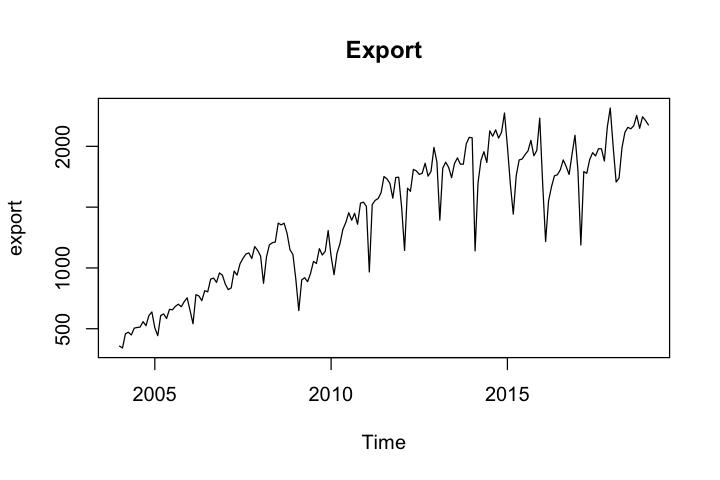

In [25]:
export=read.csv('export.csv',header=TRUE)
export=ts(export$x,start=c(2004,1),frequency=12)
ts.plot(export,main="Export")

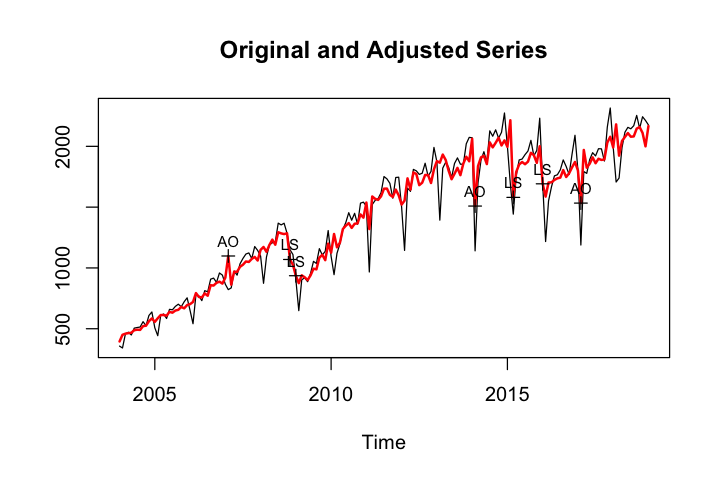

In [53]:
m<-seas(export,regression.aictest=NULL)
plot(m)

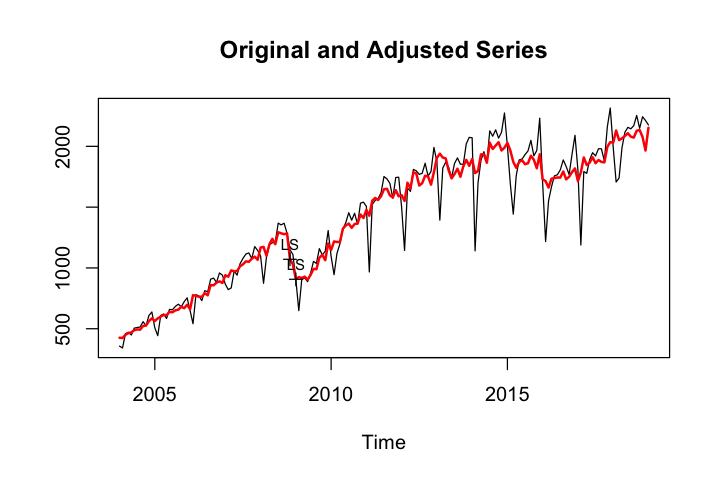

In [32]:
m1<-seas(export,xreg=genhol_flow(cny,pre=7,during=7,post=14),regression.aictest=NULL,regression.usertype="holiday")
plot(m1)

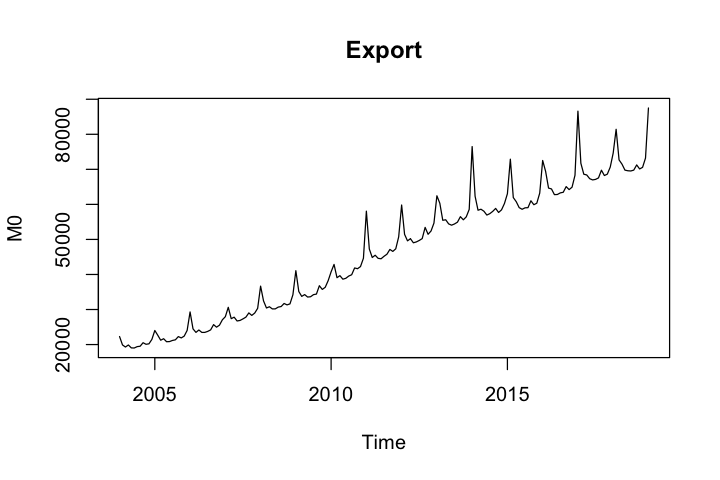

In [33]:
M0=read.csv('M0.csv',header=TRUE)
M0=ts(M0$x,start=c(2004,1),frequency=12)
ts.plot(M0,main="Export")

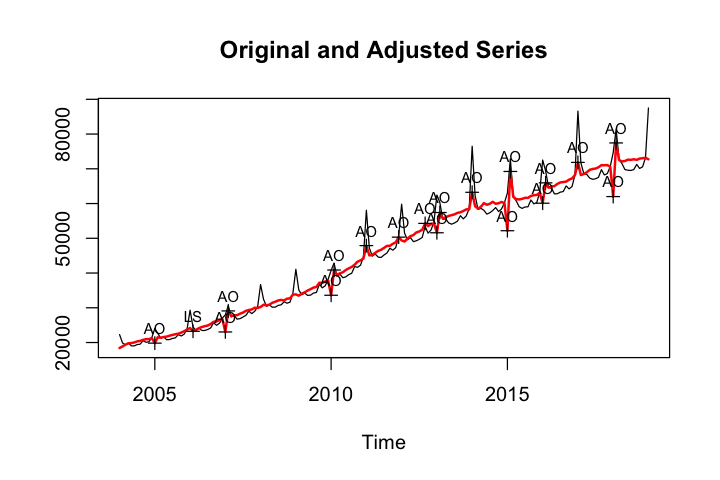

In [35]:
m2<-seas(M0,regression.aictest=NULL)
plot(m2)

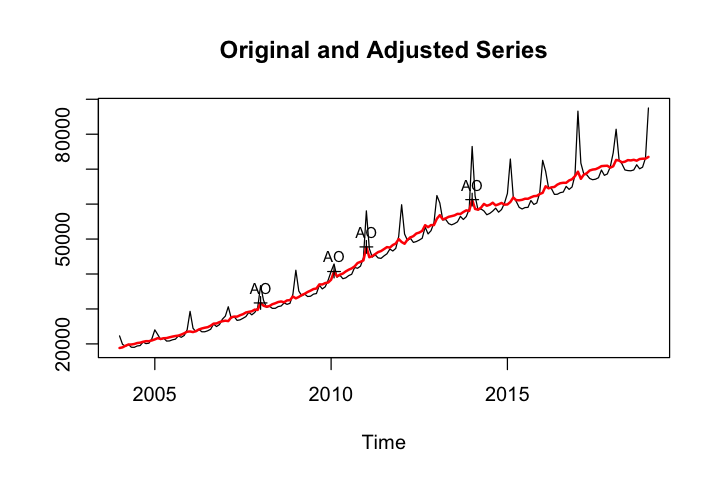

In [47]:
m3<-seas(M0,xreg=genhol_stock(cny,pre=14,during=7,post=7),regression.aictest=NULL,regression.usertype="holiday")
plot(m3)

In [48]:
export_crit<-crit_flow(export)

In [49]:
export_crit

AIC,post=5,post=6,post=7,post=8,post=9,post=10,post=11,post=12,post=13,post=14,post=15,post=16,post=17,post=18,post=19,post=20
pre=5,1957.6878,1951.7827,1943.5333,1934.9854,1926.4876,1918.9663,1934.9046,1929.6028,1925.5553,1922.5448,1920.4232,1918.9221,1917.5974,1881.8266,1880.4536,1879.4785
pre=6,1955.9183,1950.0187,1941.777,1933.2218,1924.7167,1917.1877,1933.06,1927.7383,1923.6944,1920.7114,1918.6321,1917.1871,1915.9286,1880.3263,1879.0154,1878.0849
pre=7,1954.26,1948.3684,1940.1465,1931.6079,1923.1278,1915.6283,1931.4514,1926.1515,1922.1477,1919.2259,1917.2192,1915.8569,1914.6744,1879.2358,1877.9788,1877.084
pre=8,1952.4197,1946.5715,1938.4179,1929.9493,1921.552,1914.1382,1930.1173,1924.8973,1920.9856,1918.1712,1916.2763,1915.0174,1879.857,1878.4358,1877.2217,1876.3495
pre=9,1950.5967,1944.8266,1936.7871,1928.4381,1920.1749,1912.8949,1929.1624,1924.0637,1920.2768,1917.5835,1915.8003,1914.6312,1879.3125,1877.9271,1876.7331,1875.8625
pre=10,1948.7305,1943.0857,1935.2178,1927.0432,1918.9683,1911.8701,1928.5136,1923.5694,1919.9212,1917.3442,1915.6552,1914.5507,1878.9971,1877.6251,1876.4288,1875.5393
pre=11,1946.9893,1941.4841,1933.8098,1925.8341,1917.9727,1911.0787,1928.1276,1923.352,1919.8452,1917.3767,1915.7677,1914.7105,1913.7196,1877.5284,1876.3167,1875.3973
pre=12,1945.4692,1940.0996,1908.981,1924.849,1917.2078,1910.5242,1905.1307,1923.3673,1919.998,1883.7375,1916.0876,1915.0648,1879.0087,1877.628,1876.3933,1875.4385
pre=13,1944.2128,1938.9655,1931.6697,1924.0972,1916.6713,1910.1934,1904.9829,1923.5731,1920.333,1918.0527,1882.1801,1880.7532,1914.5843,1913.6964,1876.6401,1875.6478
pre=14,1943.2259,1938.0998,1910.6324,1923.6231,1916.408,1910.1242,1905.081,1923.9758,1920.8448,1918.6348,1882.6227,1881.2125,1915.207,1914.2919,1877.0451,1876.0141


In [51]:
M0_crit

AIC,post=5,post=6,post=7,post=8,post=9,post=10,post=11,post=12,post=13,post=14,post=15,post=16,post=17,post=18,post=19,post=20
pre=5,2547.3521,2576.0196,2573.4891,2585.1304,2584.7101,2525.7669,2520.7438,2562.1795,2570.1162,2526.9003,2505.7762,2614.6688,2610.8322,2611.68,2612.2764,2613.4457
pre=6,2570.2218,2524.7591,2573.4891,2546.5329,2593.1244,2522.9891,2549.5044,2559.937,2526.6495,2556.0473,2601.9653,2565.4555,2607.707,2510.1961,2609.157,2610.4677
pre=7,2570.2218,2563.0035,2534.0903,2577.7605,2616.2244,2531.4904,2497.3259,2559.0223,2525.5704,2571.498,2601.0563,2563.8986,2607.1718,2514.7646,2608.6105,2609.9796
pre=8,2442.5348,2571.344,2560.7698,2584.5591,2582.3085,2524.533,2434.997,2506.9308,2643.3562,2522.3633,2583.0882,2513.8973,2563.7197,2609.8817,2608.7625,2610.0503
pre=9,2562.0466,2551.5759,2444.9997,2573.2476,2556.7743,2436.7386,2436.1427,2446.8541,2501.6678,2525.263,2567.7214,2518.9373,2514.995,2585.1324,2584.2486,2585.8455
pre=10,2434.3072,2542.5806,2532.9055,2590.2199,2585.6143,2627.1688,2430.8441,2443.9587,2502.2846,2481.8997,2508.6752,2552.1533,2585.1262,2585.2522,2580.1193,2487.3349
pre=11,2435.5617,2588.2795,2545.3759,2599.5244,2601.9468,2578.599,2640.2316,2632.4752,2588.9934,2666.6368,2721.7813,2608.4209,2500.9707,2607.9573,2491.1795,2512.0657
pre=12,2582.5133,2548.3429,2606.698,2592.95,2579.1585,2598.839,2550.4545,2622.7434,2701.0777,2499.2043,2488.0154,2705.7799,2589.1168,2500.4488,2495.5381,2480.0608
pre=13,2563.9952,2566.112,2588.8168,2584.2117,2582.0355,2562.4181,2569.2248,2475.9226,2523.066,2515.8083,2541.4896,2500.4549,2509.5611,2608.1066,2455.1123,2521.9207
pre=14,2499.9621,2585.1813,2594.8892,2579.3132,2549.0685,2522.3702,2552.9382,2599.6317,2597.7097,2550.6065,2544.8551,2491.0004,2501.6937,2612.8923,2614.844,2549.6254


In [6]:
genhol_stock

function (x, pre, during, post, frequency = 12) 
{
    if (!inherits(x, "Date")) {
        stop("x must be of class 'Date'. Use 'as.Date' to convert.")
    }
    if (pre < 0 | during < 0 | post < 0) {
        stop("pre, during and post cannot be smaller than zero")
    }
    event.st <- x - pre
    event.en <- x + during + post
    z.ts <- ts(NA, start = as.numeric(format(event.st[1], "%Y")), 
        end = c(as.numeric(format(event.en[length(event.en)], 
            "%Y")), frequency), frequency = frequency)
    by <- switch(as.character(frequency), `12` = "month", `4` = "3 month", 
        `2` = "6 month", `1` = "year")
    period.st <- seq(from = as.Date(paste0(format(event.st[1], 
        "%Y"), "/1/1")), by = by, length.out = length(z.ts))
    suffix <- switch(as.character(frequency), `12` = "/2/1", 
        `4` = "/4/1", `2` = "/7/1")
    period.en <- seq(from = as.Date(paste0(format(event.st[1], 
        "%Y"), suffix)), by = by, length.out = length(z.ts)) - 
        1
    first.day <- as.Date(paste0(start(z.ts)[1], "/1/1"))
    if (!first.day %in% event.st) {
        event.st.added <- c(first.day, event.st)
        event.st <- c(as.Date(NA), event.st)
    }
    if (!first.day %in% event.en) {
        event.en.added <- c(first.day, event.en)
        event.en <- c(as.Date(NA), event.en)
    }
    event.st.ts <- z.ts
    event.st.ts[cut(event.st.added, by, labels = F)] <- as.character(event.st)
    event.en.ts <- z.ts
    event.en.ts[cut(event.en.added, by, labels = F)] <- as.character(event.en)
    days <- pmin((period.en), as.Date(as.character(event.en.ts)), 
        na.rm = T) - pmax(period.st, as.Date(as.character(event.st.ts)), 
        na.rm = T) + 1
    for (i in seq(length(event.st.ts))) {
        if (i > 1 & is.na(event.st.ts[i])) {
            event.st.ts[i] = event.st.ts[i - 1]
        }
    }
    days <- period.en - as.Date(as.character(event.st.ts)) + 
        1
    days[days > (pre + during + post)] = 0
    days[days < pre] = days[days < pre]/pre
    days[days > (pre + during)] = (pre + during + post + 1 - 
        days[days > (pre + during)])/post
    days[days > 1] = 1
    z.raw <- ts(c(days), start = start(z.ts), frequency = frequency(z.ts))
    z.mat <- t(matrix(z.raw, ncol = frequency(z.raw), byrow = TRUE))
    z.mat <- z.mat - rowMeans(z.mat)
    z <- ts(as.numeric((z.mat)), start = start(z.raw), frequency = frequency(z.raw))
    date <- paste(floor(time(z)), "-", round((time(z) - floor(time(z))) * 
        12 + 1, 0), sep = "")
    write.table(cbind(date, z), quote = FALSE, row.names = FALSE, 
        col.names = FALSE, "xreg_stock.csv")
    z
}